# SANITY CHECK: Do I load the dimensions in fluctuation correctly?

In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5

data = np.load(os.path.join(f'{FLUCTUATION_PATH}/fluctuation', '1a4uB.npy'))

# data[0] means the first mode, data[0][1] means the first mode for the second residue, etc.
print(data[7][2]) # eighth mode of the third residue
print(sliding_window_view(data, WINDOW_SIZE, axis=1)[7][0]) # window between the first and fifth residue of the eighth mode
a = np.mean(sliding_window_view(data, WINDOW_SIZE, axis=1)[7][0]) # average the window between the first and fifth residue of the eighth mode
print(a)
b = sliding_window_view(data, WINDOW_SIZE, axis=1).mean(axis=2)[7][0] # compute the average of the window between the first and fifth residue of the eighth mode in a similar manner as above 
print(b)
assert a == b

8.203535185141722e-05
[7.25636372e-05 8.19505477e-05 8.20353519e-05 7.78313779e-05
 6.63055169e-05]
7.6137286304773e-05
7.6137286304773e-05


In [42]:
averaged_window_view = sliding_window_view(data, WINDOW_SIZE, axis=1).mean(axis=2)
averaged_window_view.shape # averaged_window_view[0] means first mode windows, averaged_window_view[0][0] means the first window of the first mode, etc
# therefore if I want to iterate over the modes, I need to write `for i, dimension in enumerate(averaged_window_view):` ...
averaged_window_view.transpose().shape # averaged_window_view[0] means first windows of all the modes 

(254, 250)

## Compute the sliding window over the fluctuation values

In [77]:
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5

def get_averaged_window_view(data, binding_input, nonbinding_input, indices):
    indices = indices - int(WINDOW_SIZE / 2)
    indices = indices[(indices >= 0) & (indices < (data.shape[0] - WINDOW_SIZE))] # for now, remove the 

    averaged_window_view = sliding_window_view(data, WINDOW_SIZE, axis=1).mean(axis=2)
    for i, dimension in enumerate(averaged_window_view):
        
        binding_values = np.take(dimension, indices)
        nonbinding_values = np.delete(dimension, indices)
        
        if len(binding_input) == i:
            binding_input.append(binding_values)
        elif len(binding_input) > i:
            binding_input[i] = np.concatenate((binding_input[i], binding_values))
        else:
            raise IndexError("This shouldn't happen")

        if len(nonbinding_input) == i:
            nonbinding_input.append(nonbinding_values)
        elif len(nonbinding_input) > i:
            nonbinding_input[i] = np.concatenate((nonbinding_input[i], nonbinding_values))
        else:
            raise IndexError("This shouldn't happen")



def compute_windows(reverse_modes=False, range=None):
    binding_fluctuation_dimensions, nonbinding_fluctuation_dimensions = [], []
    proteins_count = 0
    # Load data from the fluctuation folder
    for filename in os.listdir(f'{FLUCTUATION_PATH}/fluctuation'):
        # print(f'Processing {filename}')
        data = np.load(os.path.join(f'{FLUCTUATION_PATH}/fluctuation', filename))
        indices = np.load(os.path.join(f'{FLUCTUATION_PATH}/indices', filename))

        if range is not None:
            if len(data) < range[0] or len(data) > range[1]:
                continue
                
        if reverse_modes:
            data = np.flip(data, axis=0) # axis=0 means we are taking the modes (axis=1 would mean taking the residues)
        
        get_averaged_window_view(data, binding_fluctuation_dimensions, nonbinding_fluctuation_dimensions, indices)

        proteins_count += 1

    return binding_fluctuation_dimensions, nonbinding_fluctuation_dimensions, proteins_count


def print_barcharts(binding_data, nonbinding_data, title='', limit=None):
    # Compute median values for each position
    binding_medians = [np.median(data) for data in binding_data]
    nonbinding_medians = [np.median(data) for data in nonbinding_data]

    ylim = max(np.max(binding_medians), np.max(nonbinding_medians))
    # Generate histograms of median values for each position
    plt.figure(figsize=(12, 6))
    plt.suptitle(title)

    plt.subplot(221)
    plt.bar(range(0, len(binding_medians)), binding_medians, width=1.0, alpha=0.7, label='Binding')
    plt.title('Histogram of median values for each mode (Binding)')
    plt.xlabel('Mode')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()

    plt.subplot(222)
    plt.bar(range(0, len(nonbinding_medians)), nonbinding_medians, width=1.0, alpha=0.7, label='Nonbinding')
    plt.title('Histogram of vedian values for each mode (Nonbinding)')
    plt.xlabel('Mode')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()

    plt.subplot(212)
    plt.bar(list(range(0, len(binding_medians))), binding_medians, width=1.0, label='Binding', alpha=0.5)
    plt.bar(list(range(0, len(nonbinding_medians))), nonbinding_medians, width=1.0, label='Nonbinding', alpha=0.5)
    plt.title('Combined Histogram of Median Values')
    plt.xlabel('Mode')
    plt.ylabel('Median Value')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)

    plt.legend()
    plt.tight_layout()
    plt.show()


Processing 1jpmA.npy
Processing 2yx7A.npy
Processing 2e1cA.npy
Processing 1qhtA.npy
Processing 6cjfA.npy
Processing 2w6rA.npy
Processing 5x6zD.npy
Processing 1nkoA.npy
Processing 5caeB.npy
Processing 1macB.npy
Processing 4dmzB.npy
Processing 4gvrA.npy
Processing 6kx4A.npy
Processing 4ok2B.npy
Processing 4ljpA.npy
Processing 5v49A.npy
Processing 7l8qA.npy
Processing 1g1oA.npy
Processing 1g1oD.npy
Processing 4m23B.npy
Processing 7se6A.npy
Processing 4yt8B.npy
Processing 4brrE.npy
Processing 1vjuB.npy
Processing 1nwhB.npy
Processing 5uzvZ.npy
Processing 4jycC.npy
Processing 1mufA.npy
Processing 6lgyA.npy
Processing 3p08B.npy
Processing 1l0wB.npy
Processing 6cy1A.npy
Processing 6ksuA.npy
Processing 1e5lB.npy
Processing 8c3uA.npy
Processing 7btcB.npy
Processing 7oueA.npy
Processing 3vskB.npy
Processing 4z4lA.npy
Processing 7s5gA.npy
Processing 3l15A.npy
Processing 8jisR.npy
Processing 7ciuA.npy
Processing 6dauE.npy
Processing 2zcoA.npy
Processing 1m1zA.npy
Processing 3vjbD.npy
Processing 1w

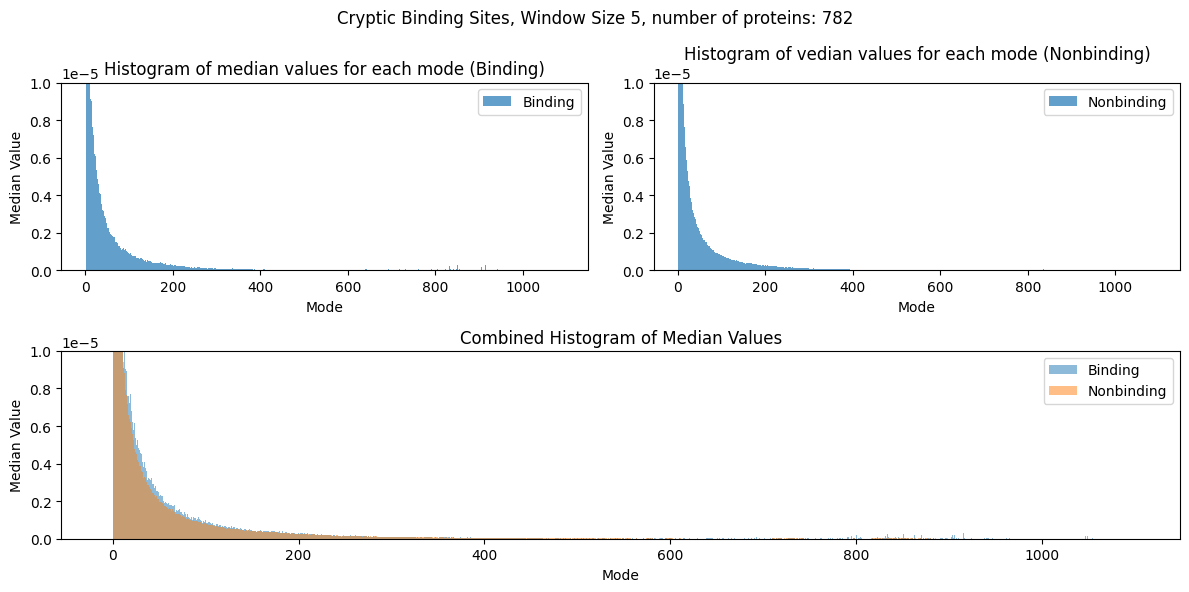

In [35]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.1e-4)

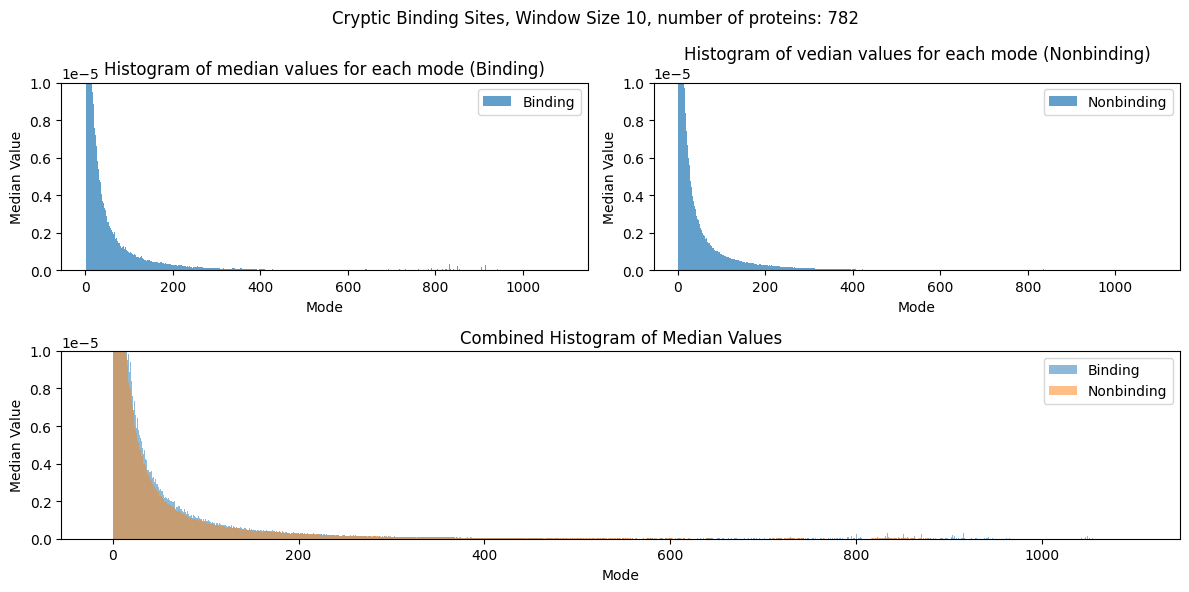

In [ ]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 10
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 10, number of proteins: ' + str(count), limit=0.1e-4)

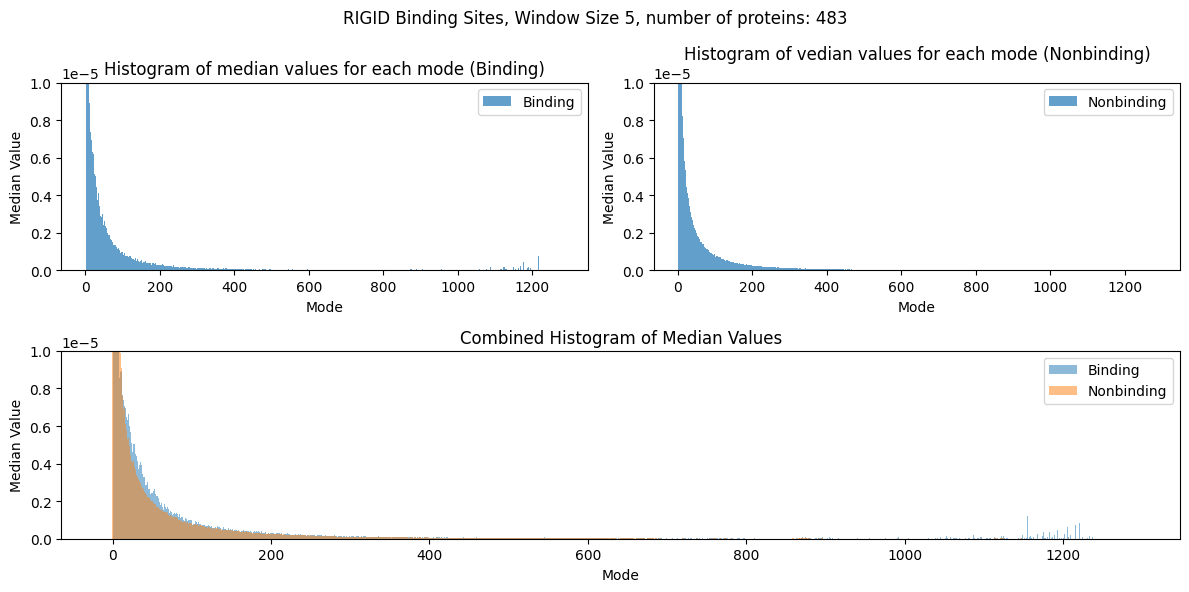

In [ ]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows()
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.1e-4)

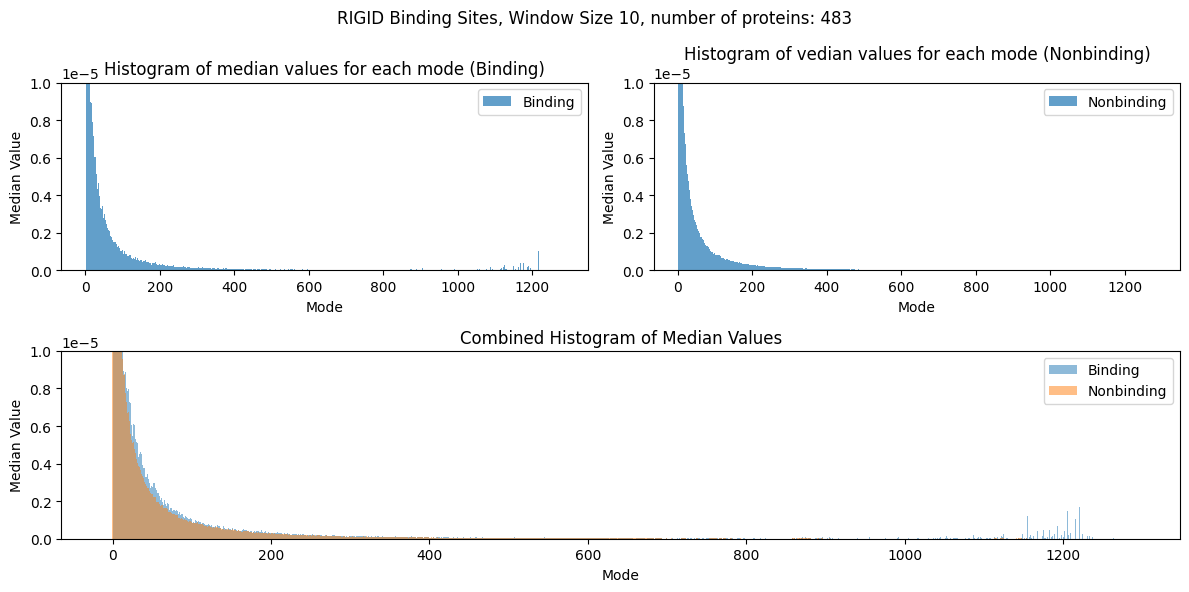

In [ ]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 10
binding_data_rigid, nonbinding_data_rigid, count = compute_windows()
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 10, number of proteins: ' + str(count), limit=0.1e-4)

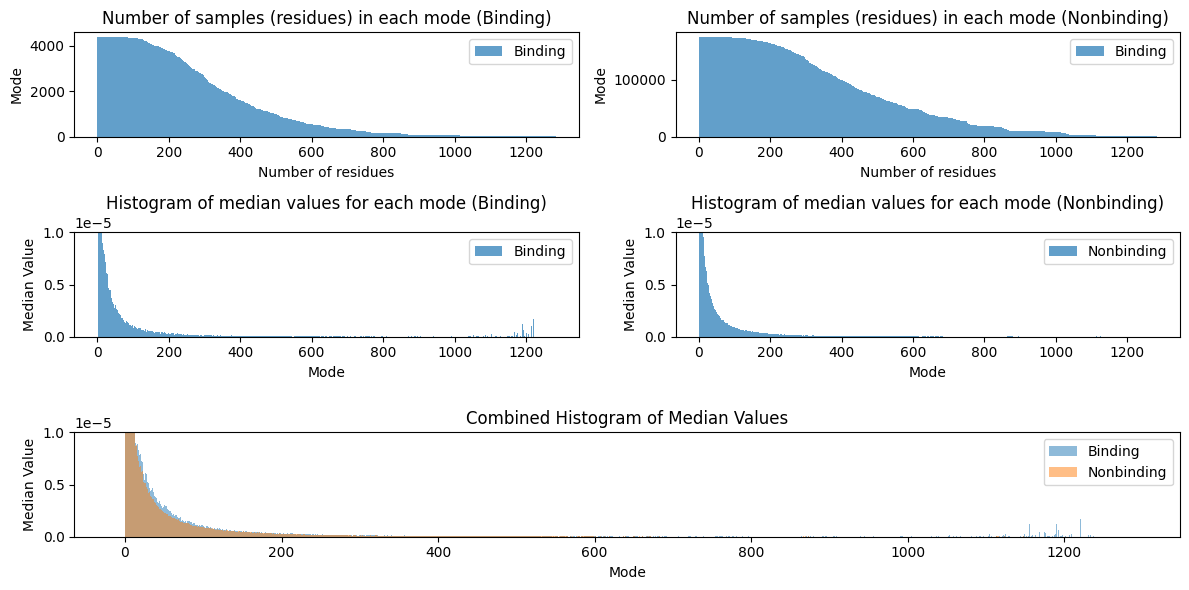

In [14]:
def print_barcharts_with_inset(binding_data, nonbinding_data, limit=None):
    # Compute median values for each position
    binding_medians = [np.median(data) for data in binding_data]
    nonbinding_medians = [np.median(data) for data in nonbinding_data]

    if limit:
        ylim = limit
    else:
        ylim = max(np.max(binding_medians), np.max(nonbinding_medians))

    # Generate histograms of median values for each position
    plt.figure(figsize=(12, 6))

    plt.subplot(3,2,1)
    plt.bar(range(0, len(binding_medians)), [len(data) for data in binding_data], width=1.0, alpha=0.7, label='Binding')
    plt.title('Number of samples (residues) in each mode (Binding)')
    plt.xlabel('Number of residues')
    plt.ylabel('Mode')
    plt.legend()

    plt.subplot(3,2,2)
    plt.bar(range(0, len(binding_medians)), [len(data) for data in nonbinding_data], width=1.0, alpha=0.7, label='Binding')
    plt.title('Number of samples (residues) in each mode (Nonbinding)')
    plt.xlabel('Number of residues')
    plt.ylabel('Mode')
    plt.legend()

    plt.subplot(3,2,3)
    plt.bar(range(0, len(binding_medians)), binding_medians, width=1.0, alpha=0.7, label='Binding')
    plt.title('Histogram of median values for each mode (Binding)')
    plt.xlabel('Mode')
    plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()

    plt.subplot(3,2,4)
    plt.bar(range(0, len(nonbinding_medians)), nonbinding_medians, width=1.0, alpha=0.7, label='Nonbinding')
    plt.title('Histogram of median values for each mode (Nonbinding)')
    plt.xlabel('Mode')
    plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()

    plt.subplot(3,1,3)
    plt.bar(list(range(0, len(binding_medians))), binding_medians, width=1.0, label='Binding', alpha=0.5)
    plt.bar(list(range(0, len(nonbinding_medians))), nonbinding_medians, width=1.0, label='Nonbinding', alpha=0.5)
    plt.title('Combined Histogram of Median Values')
    plt.xlabel('Mode')
    plt.ylabel('Median Value')
    plt.ylim(0, ylim)


    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with the existing data
print_barcharts_with_inset(binding_data_rigid, nonbinding_data_rigid, limit=0.1e-4)

# TODO: improve this: neco takoveho by bylo lepsi, tohle je trochu random: https://www.google.com/search?q=matplotlib:%20plotting%20histogram%20plot%20just%20above%20scatter%20plot
# TODO: zkusit prevratit poradi tech modu, jestli to trba nebude vypadat lip

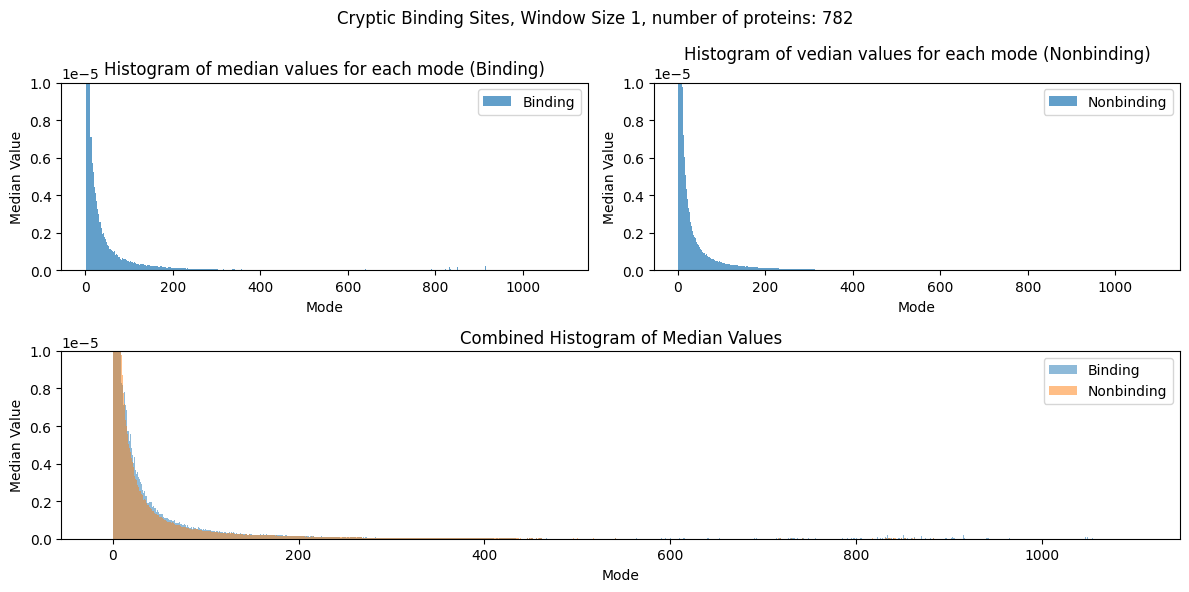

In [39]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 1
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 1, number of proteins: ' + str(count), limit=0.1e-4)

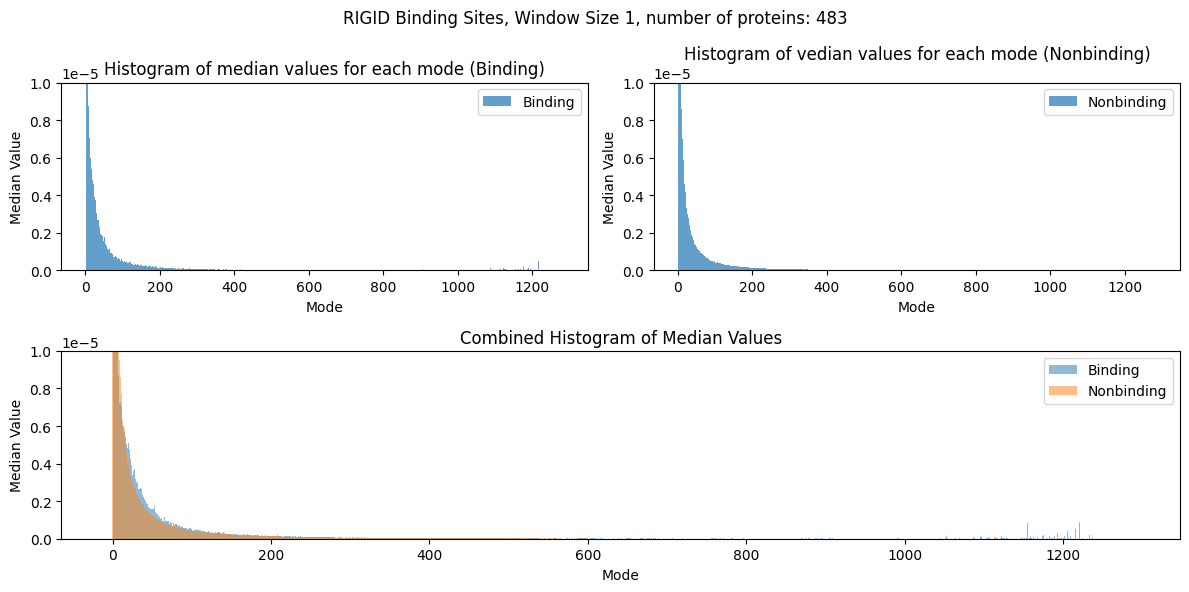

In [40]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 1
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='RIGID Binding Sites, Window Size 1, number of proteins: ' + str(count), limit=0.1e-4)

### Reverse the modes

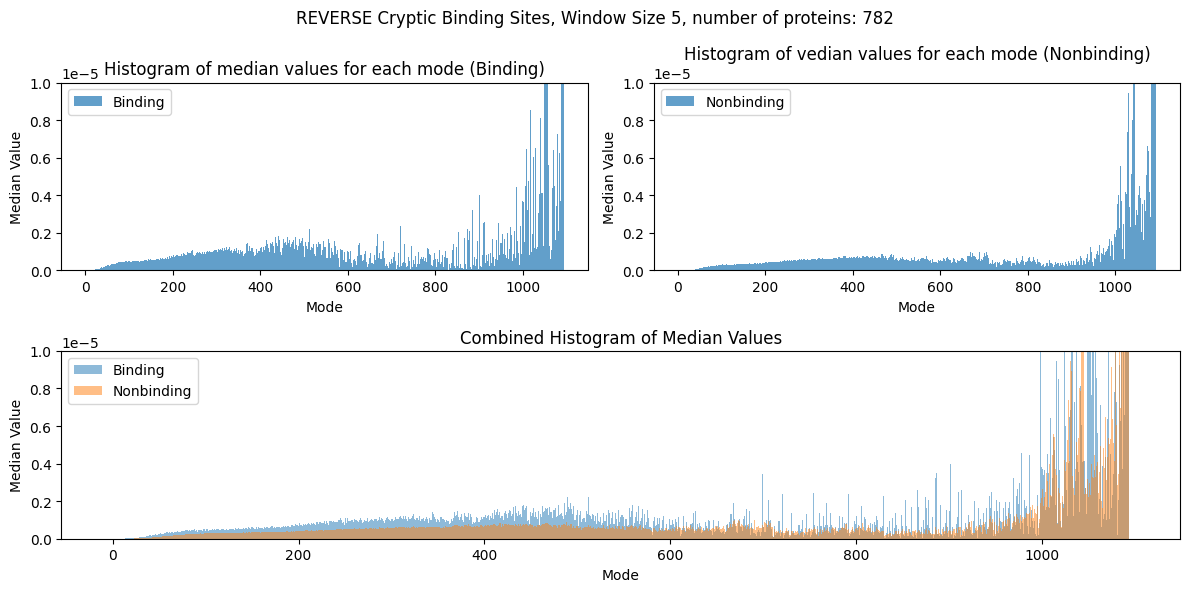

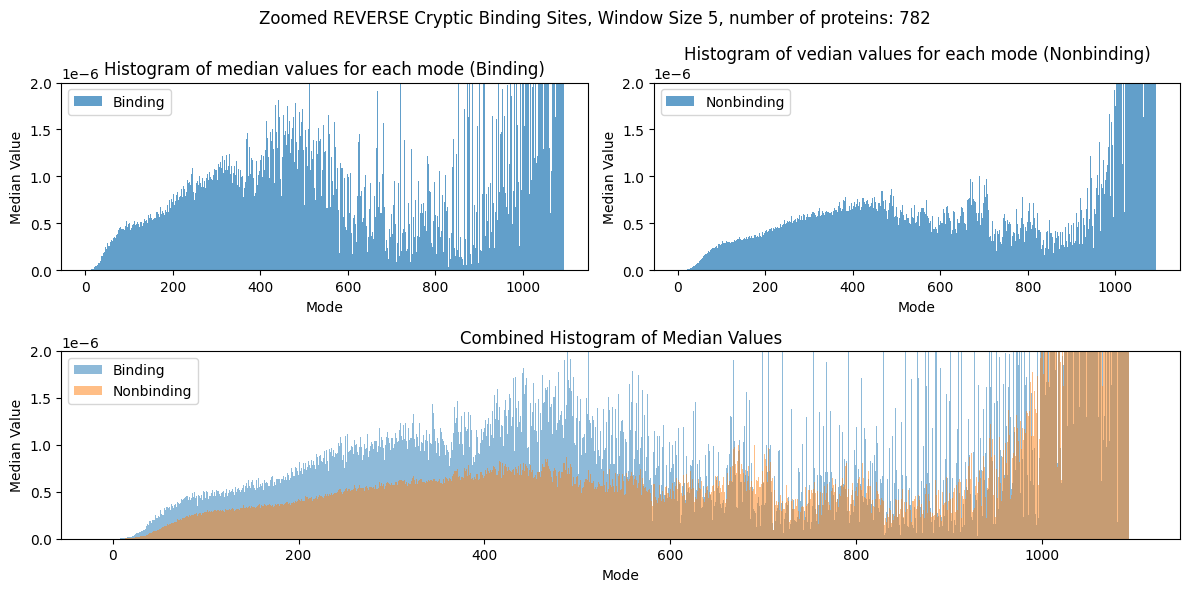

In [41]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(reverse_modes=True)
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='REVERSE Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.1e-4)
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Zoomed REVERSE Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.2e-5)

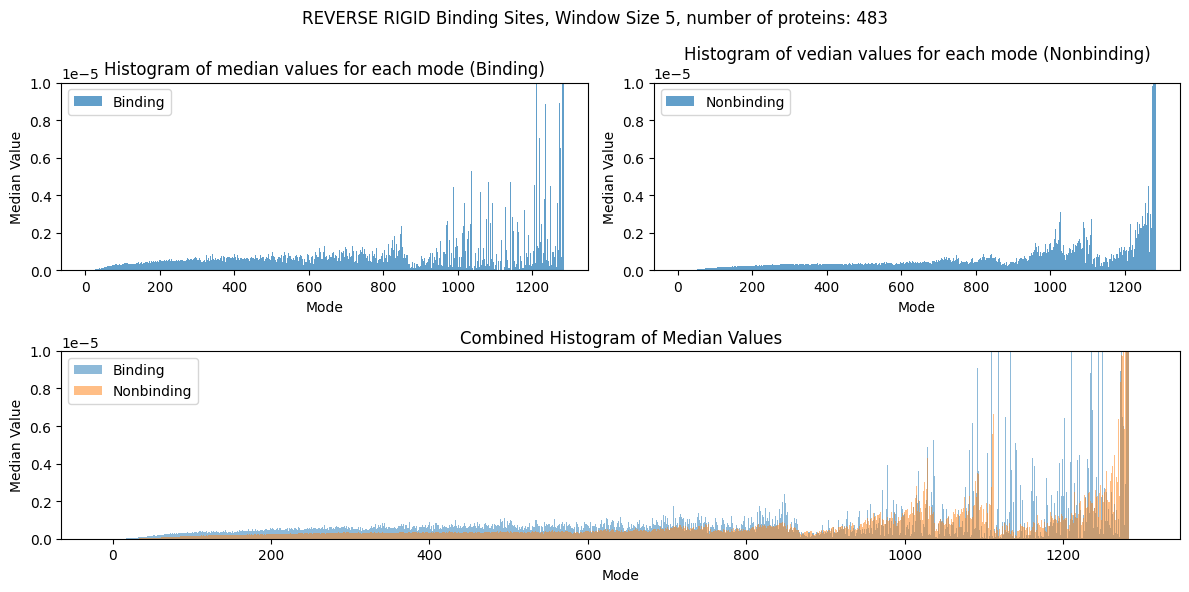

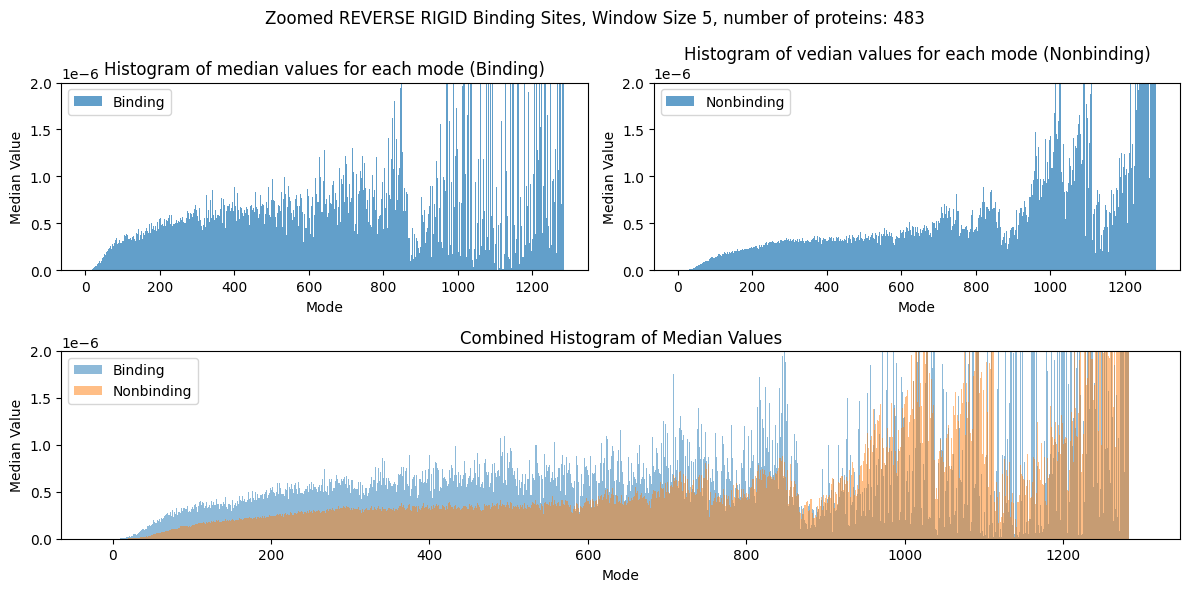

In [42]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True)
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='REVERSE RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.1e-4)
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='Zoomed REVERSE RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.2e-5)

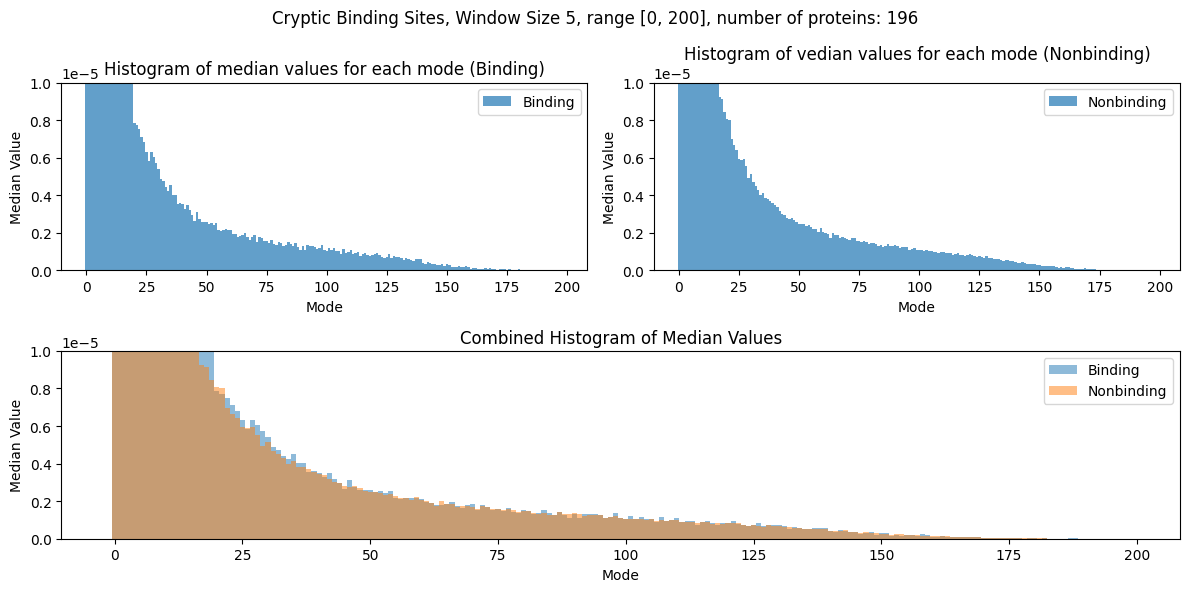

In [80]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(range=(0, 200))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, range [0, 200], number of proteins: ' + str(count), limit=0.1e-4)

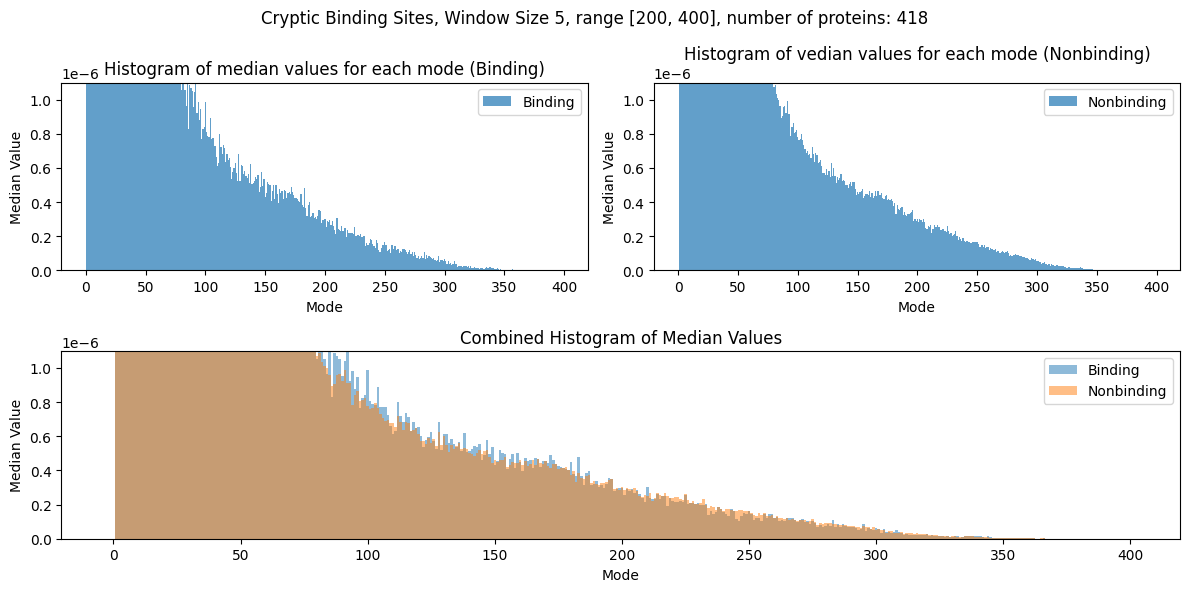

In [117]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(range=(200,400))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, range [200, 400], number of proteins: ' + str(count), limit=1.1e-06)

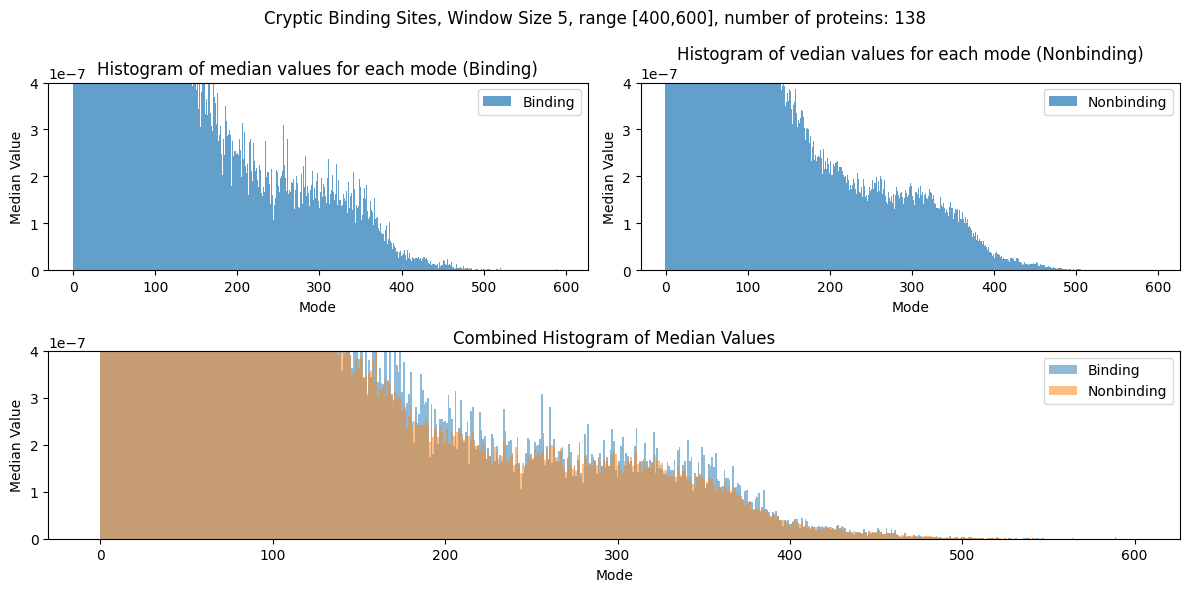

In [79]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(range=(400,600))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, range [400,600], number of proteins: ' + str(count), limit=0.4e-06)

In [120]:
def print_barcharts_with_variance(binding_data, nonbinding_data, title='', limit=None):
    # Compute median values for each position
    binding_medians = [np.median(data) for data in binding_data]
    nonbinding_medians = [np.median(data) for data in nonbinding_data]

    ylim = max(np.max(binding_medians), np.max(nonbinding_medians))
    # Generate histograms of median values for each position
    plt.figure(figsize=(12, 6))
    plt.suptitle(title)

    plt.subplot(121)
    plt.bar(range(0, len(binding_medians)), binding_medians, width=1.0, alpha=0.7, label='Binding')

    upper_binding_variance = [np.percentile(data, 75) for data in binding_data]
    lower_binding_variance = [np.percentile(data, 25) for data in binding_data]
    plt.bar(range(0, len(lower_binding_variance)), lower_binding_variance, width=1.0, alpha=0.3, label='25 percentile')
    plt.bar(range(0, len(upper_binding_variance)), upper_binding_variance, width=1.0, alpha=0.3, label='75 percentile')

    plt.title('Histogram of median values for each mode (Binding)')
    plt.xlabel('Mode')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()


    plt.subplot(122)
    plt.bar(range(0, len(nonbinding_medians)), nonbinding_medians, width=1.0, alpha=0.7, label='Nonbinding')

    upper_nonbinding_variance = [np.percentile(data, 75) for data in nonbinding_data]
    lower_nonbinding_variance = [np.percentile(data, 25) for data in nonbinding_data]
    plt.bar(range(0, len(lower_nonbinding_variance)), lower_nonbinding_variance, width=1.0, alpha=0.3, label='25 percentile')
    plt.bar(range(0, len(upper_nonbinding_variance)), upper_nonbinding_variance, width=1.0, alpha=0.3, label='75 percentile')

    plt.title('Histogram of vedian values for each mode (Nonbinding)')
    plt.xlabel('Mode')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()


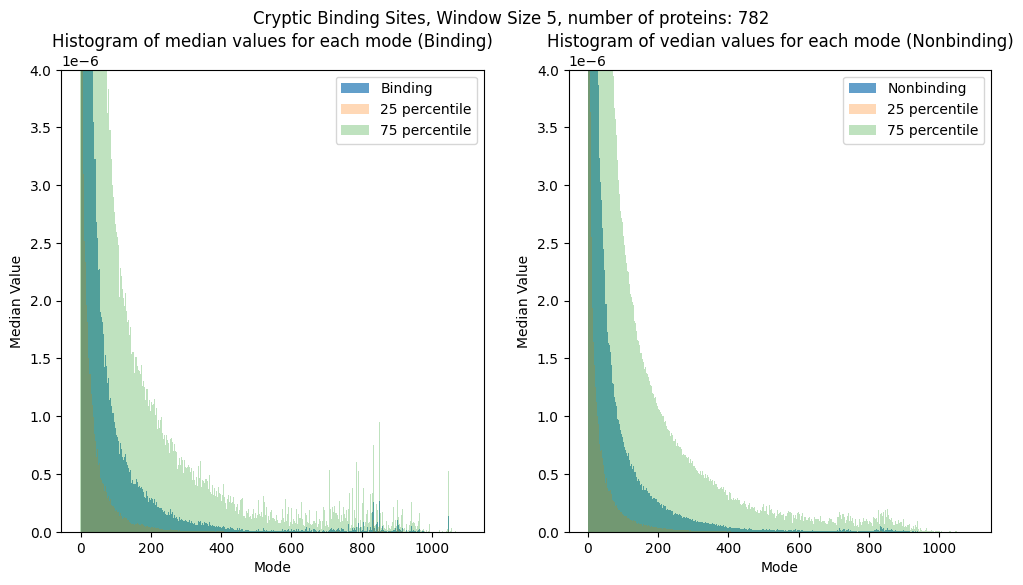

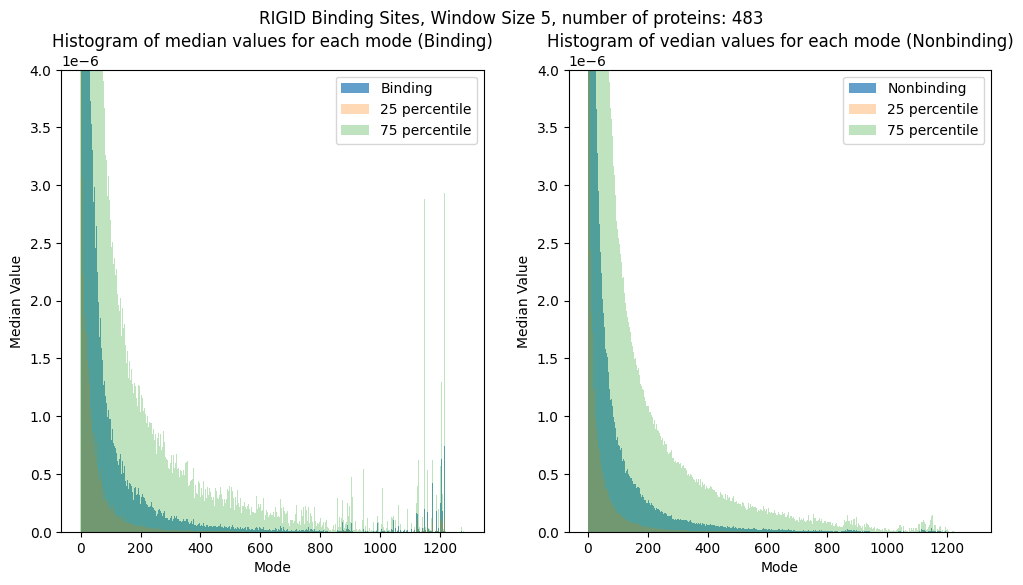

In [128]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts_with_variance(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=4e-06)
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
binding_data_rigid, nonbinding_data_rigid, count = compute_windows()
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=4e-06)

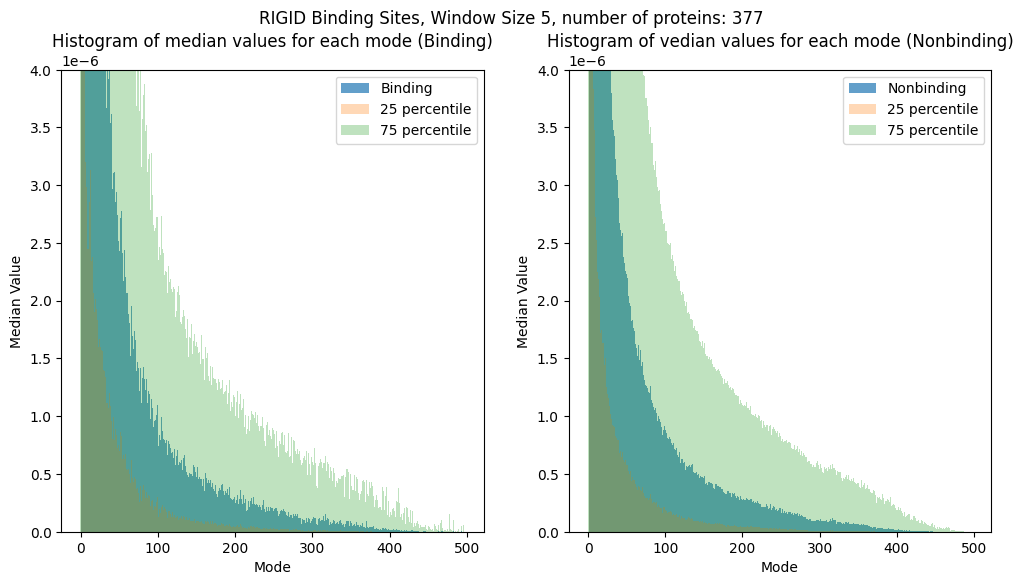

In [123]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(range=(0, 500))
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=4e-06)

Try this for the reversed mode order ...


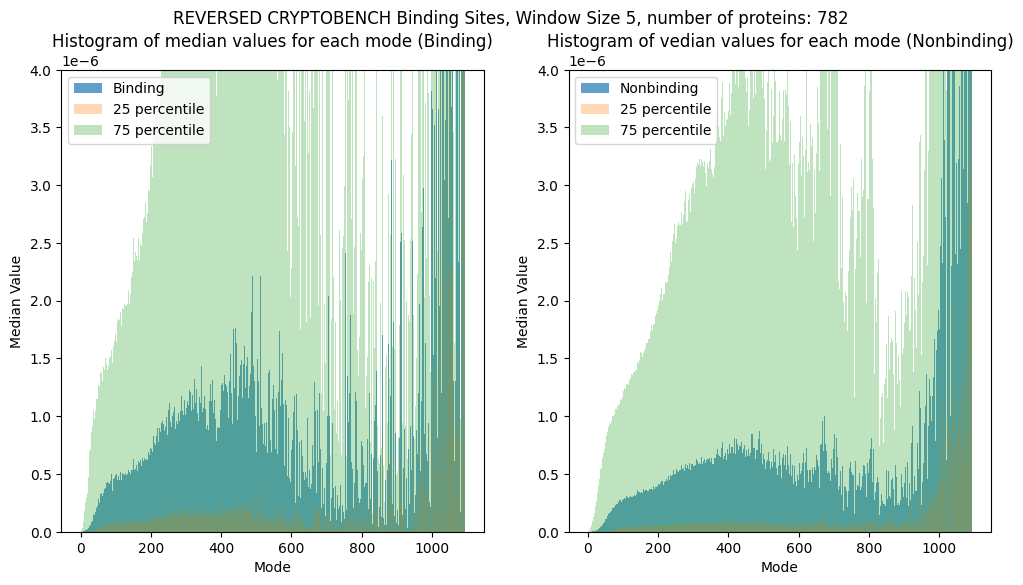

In [92]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True)
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='REVERSED CRYPTOBENCH Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=4e-06)

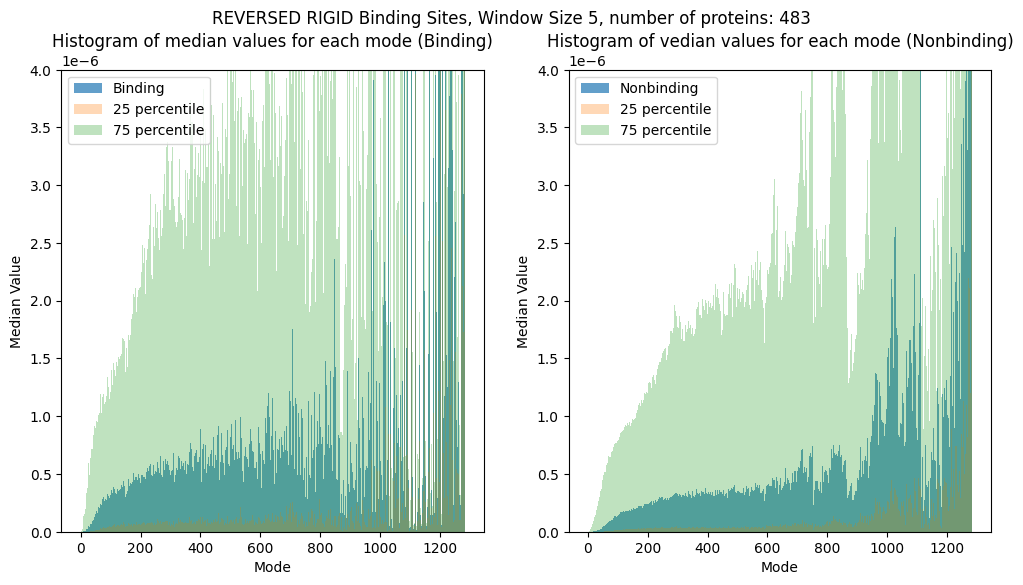

In [93]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True)
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='REVERSED RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=4e-06)

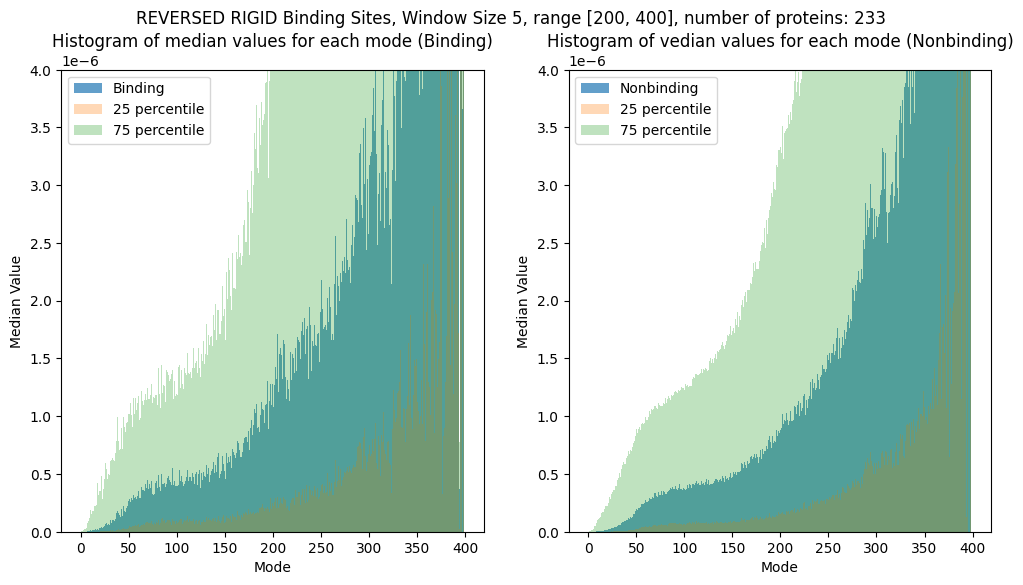

In [94]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True,range=(200, 400))
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='REVERSED RIGID Binding Sites, Window Size 5, range [200, 400], number of proteins: ' + str(count), limit=4e-06)

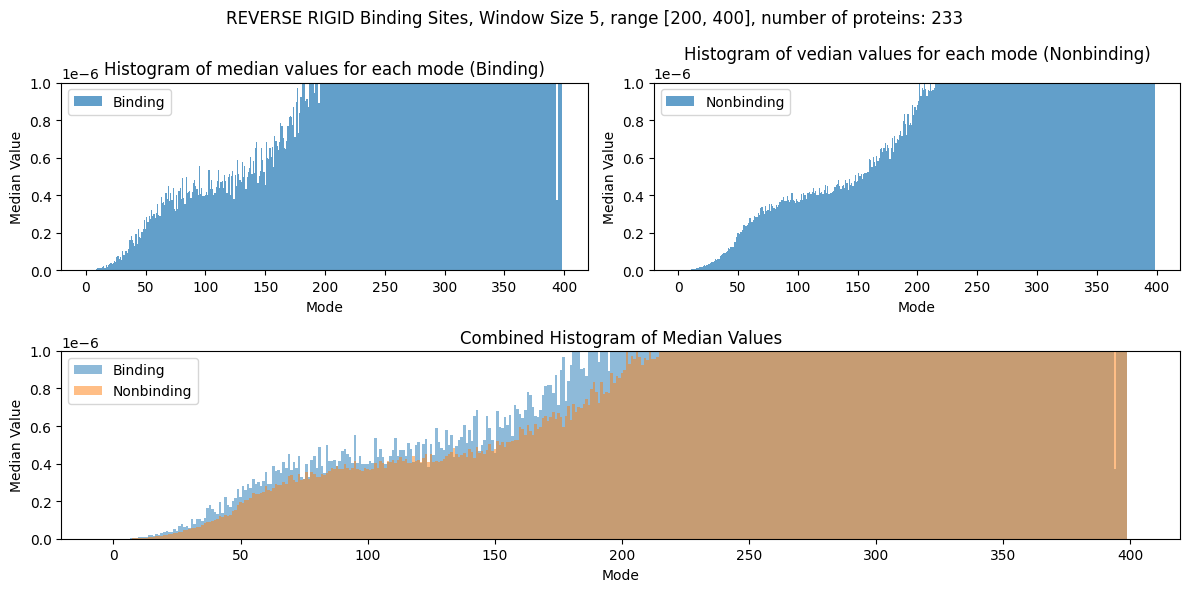

In [103]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(reverse_modes=True,range=(200, 400))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='REVERSE RIGID Binding Sites, Window Size 5, range [200, 400], number of proteins: ' + str(count), limit=0.1e-05)

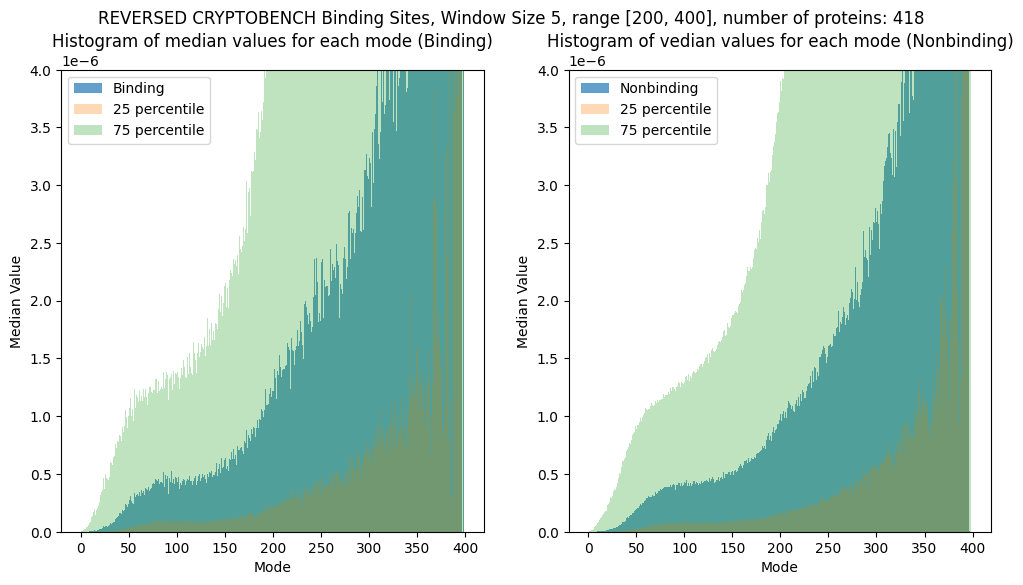

In [99]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True,range=(200, 400))
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='REVERSED CRYPTOBENCH Binding Sites, Window Size 5, range [200, 400], number of proteins: ' + str(count), limit=4e-06)

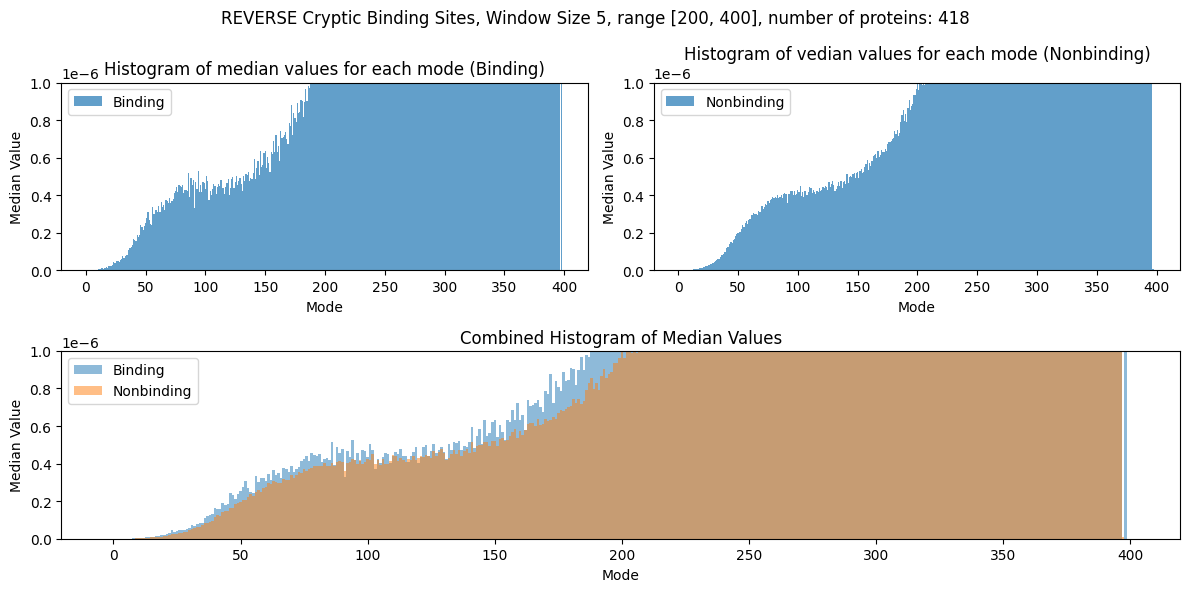

In [102]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(reverse_modes=True,range=(200, 400))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='REVERSE Cryptic Binding Sites, Window Size 5, range [200, 400], number of proteins: ' + str(count), limit=0.1e-05)

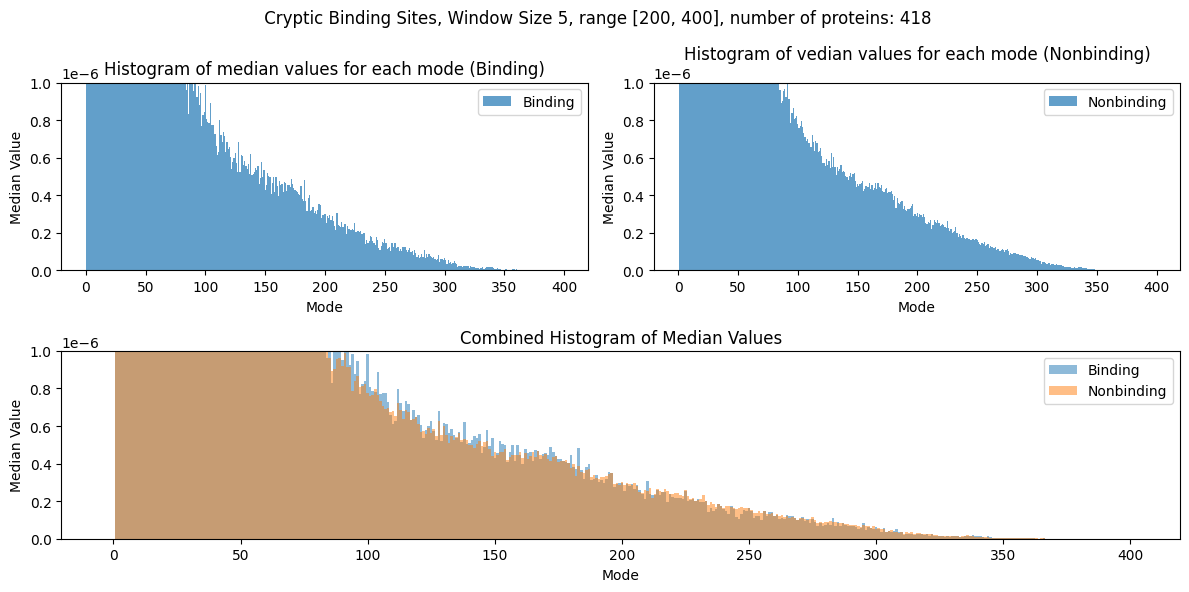

In [104]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(range=(200, 400))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title=' Cryptic Binding Sites, Window Size 5, range [200, 400], number of proteins: ' + str(count), limit=0.1e-05)

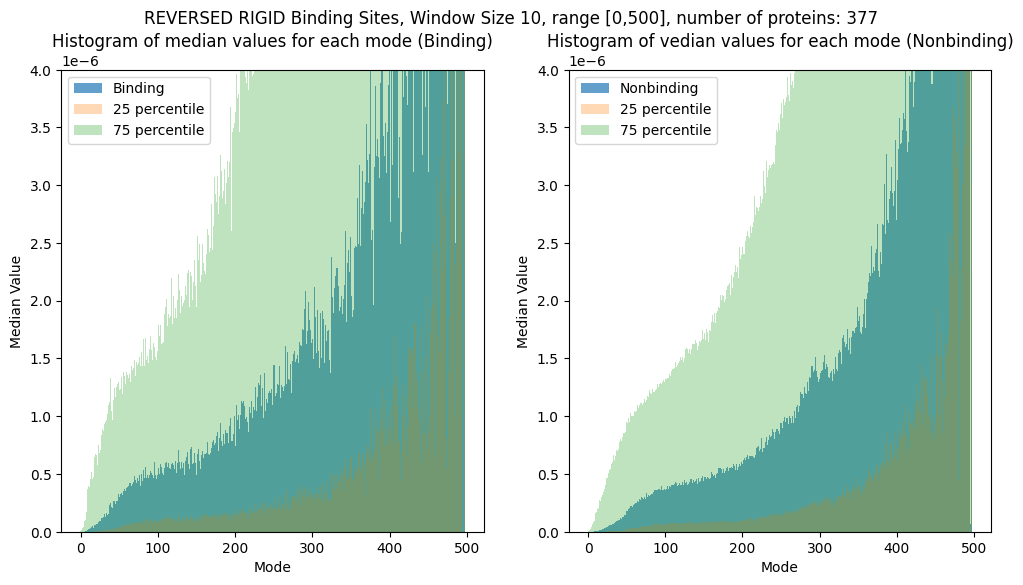

In [90]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 10
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True,range=(0, 500))
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='REVERSED RIGID Binding Sites, Window Size 10, range [0,500], number of proteins: ' + str(count), limit=4e-06)

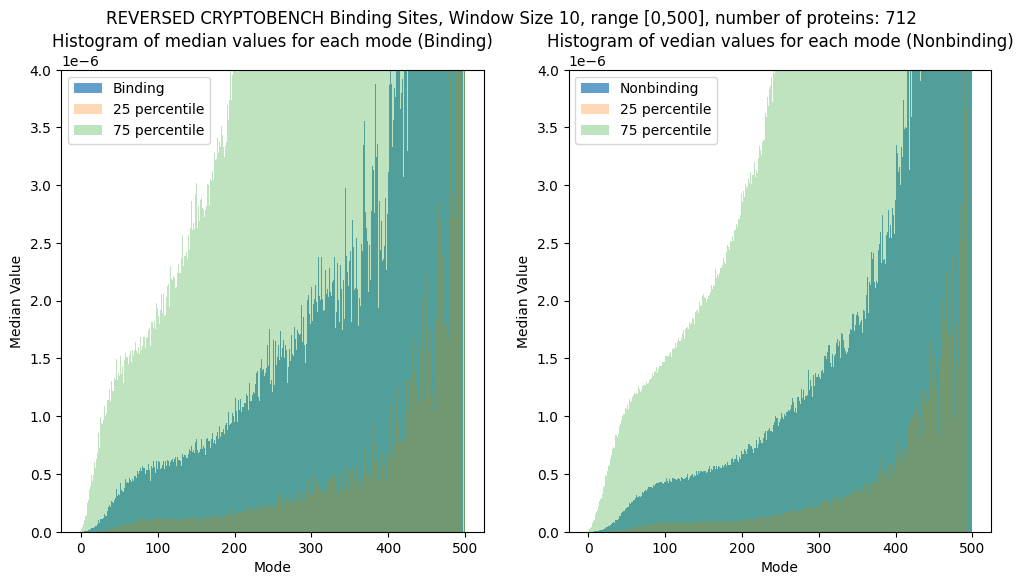

In [91]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 10
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True,range=(0, 500))
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='REVERSED CRYPTOBENCH Binding Sites, Window Size 10, range [0,500], number of proteins: ' + str(count), limit=4e-06)

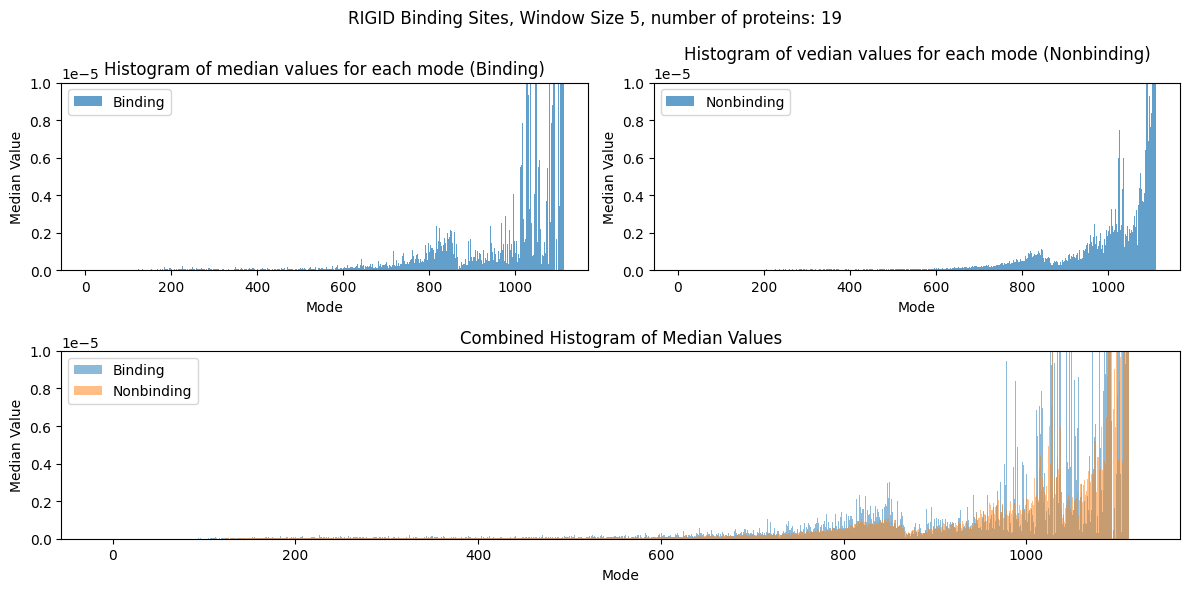

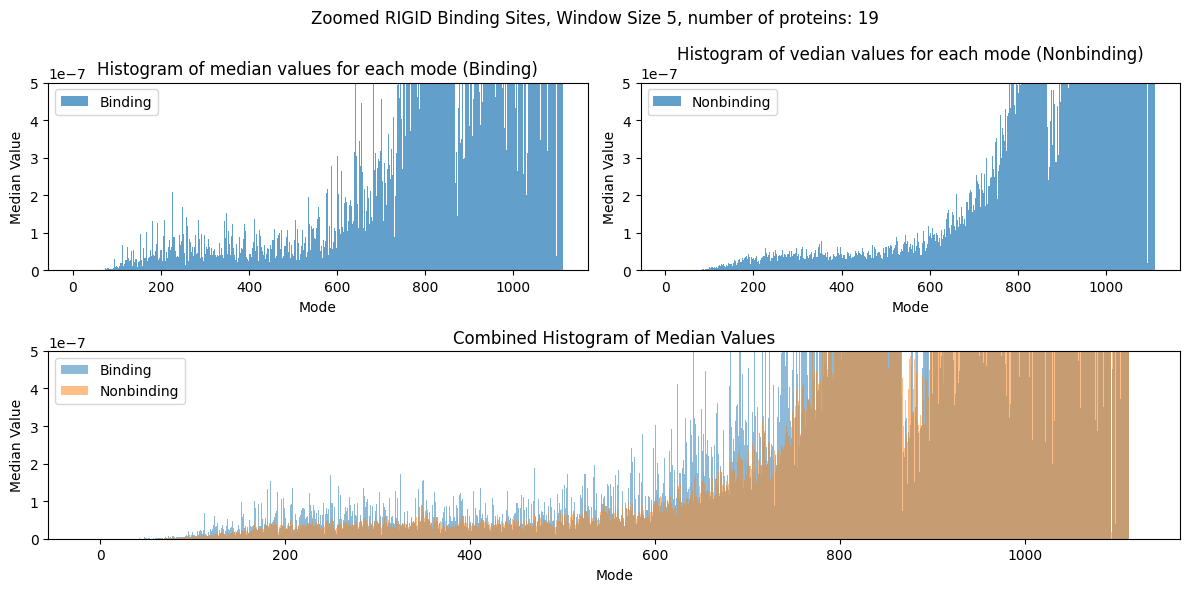

In [82]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True, range=(800, 1200))

print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.1e-4)
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='Zoomed RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.5e-6)